In [3]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Crop Production data.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values
data = data.dropna()  # or use data.fillna() for imputation

# Convert categorical columns to numerical
data['State_Name'] = data['State_Name'].astype('category').cat.codes
data['District_Name'] = data['District_Name'].astype('category').cat.codes
data['Season'] = data['Season'].astype('category').cat.codes
data['Crop'] = data['Crop'].astype('category').cat.codes

# Display the first few rows of the transformed dataset
print(data.head())


                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64
   State_Name  District_Name  Crop_Year  Season  Crop    Area  Production
0           0            427       2000       1     2  1

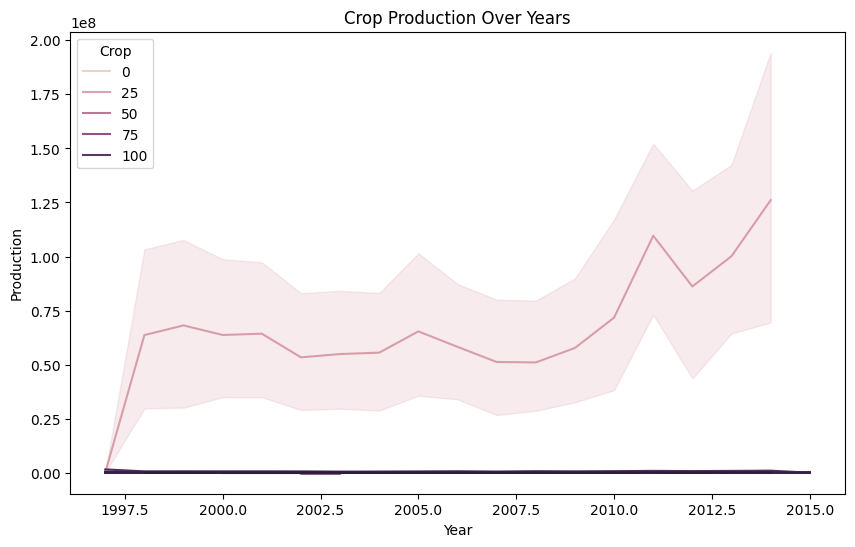

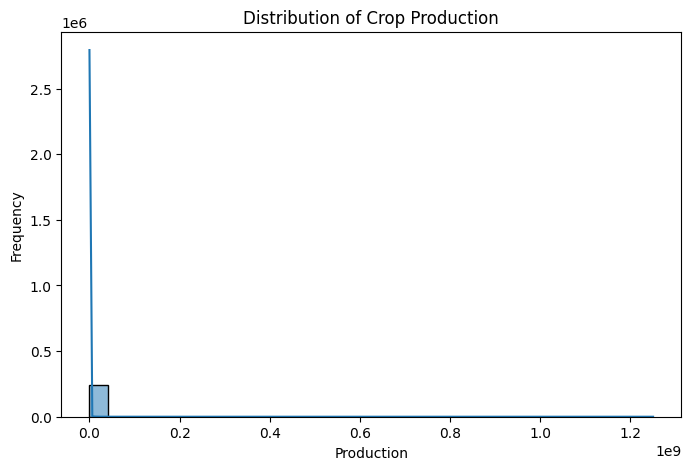

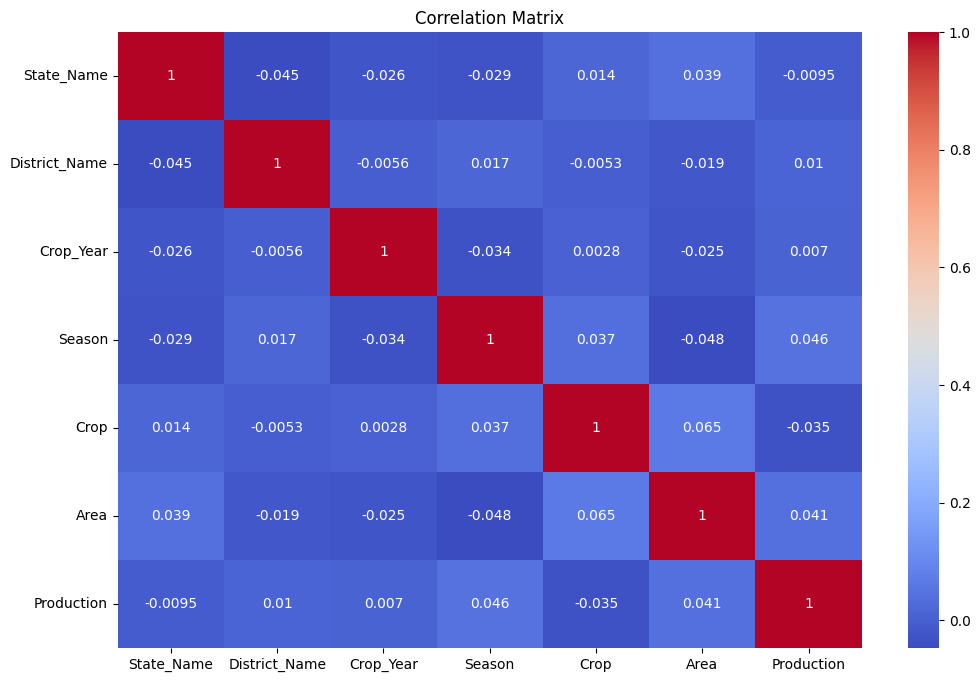

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot crop production over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Crop_Year', y='Production', hue='Crop')
plt.title('Crop Production Over Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

# Plot the distribution of production
plt.figure(figsize=(8, 5))
sns.histplot(data['Production'], bins=30, kde=True)
plt.title('Distribution of Crop Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
# Create new features if necessary
data['Production_per_Area'] = data['Production'] / data['Area']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = data[['Area', 'Crop_Year', 'State_Name', 'District_Name', 'Season', 'Crop']]
y = data['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 399775706589348.4
R^2 Score: 0.006368027228819684


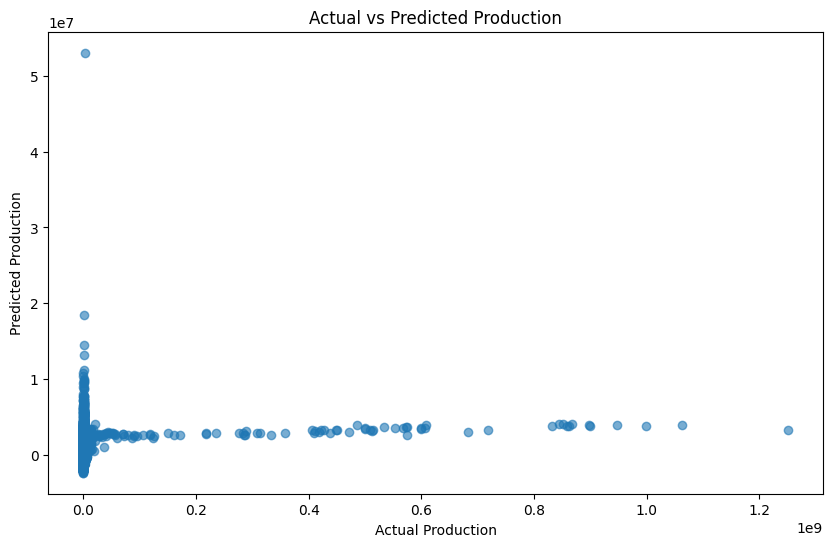

In [7]:
# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs Predicted Production')
plt.show()

# Save the final dataset
data.to_csv('processed_crop_production_data.csv', index=False)
